In [20]:
from keras.applications import VGG16
from src.vis import utils
from src.vis.utils import utils
from keras import activations
from keras.models import model_from_json
from src.models.model_manager import get_optimizer
from matplotlib import pyplot as plt



json_file = open('D:\Work\AITeam\multiclass_keras\models/model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# convert json to keras model file
model = model_from_json(loaded_model_json)
#load woeights into new model
model.load_weights("D:\Work\AITeam\multiclass_keras\models/model.h5")
model.compile(loss='categorical_crossentropy', optimizer=get_optimizer())
print(model.summary())

layer_idx = utils.find_layer_idx(model, 'Dense_2')
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Convolution2D_236 (Conv2D)      (None, 112, 112, 32) 896         Input_1[0][0]                    
__________________________________________________________________________________________________
Convolution2D_235 (Conv2D)      (None, 112, 112, 32) 9248        Convolution2D_236[0][0]          
__________________________________________________________________________________________________
Convolution2D_237 (Conv2D)      (None, 110, 110, 64) 18496       Convolution2D_235[0][0]          
__________________________________________________________________________________________________
MaxPooling

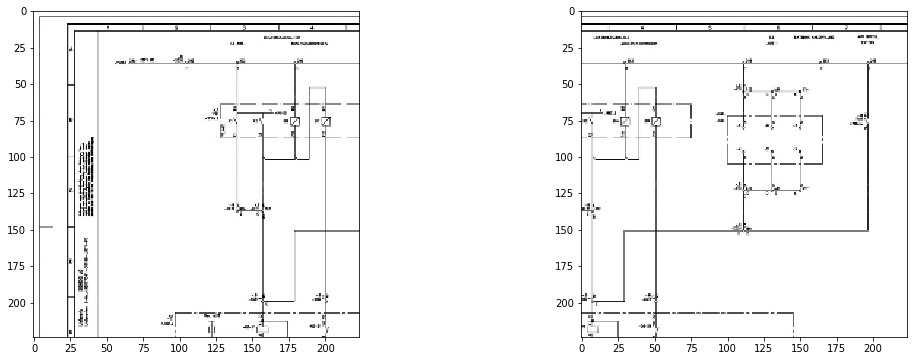

In [21]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)
img1 = utils.load_img('D:/Work\AITeam/multiclass_keras/data/processed/transformed/Etechnik_JPG_Plaene/Etechnik_JPG_Plaene6_0.jpg', target_size=(224, 224))
img2 = utils.load_img('D:/Work\AITeam/multiclass_keras/data/processed/transformed/Etechnik_JPG_Plaene/Etechnik_JPG_Plaene6_1.jpg', target_size=(224, 224))
f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [29]:
from src.vis.losses import ActivationMaximization
from src.vis.regularizers import TotalVariation, LPNorm
import imageio
from src.vis.optimizer import Optimizer
from src.vis.callbacks import GifGenerator


# Build the VGG16 network with ImageNet weights
print('Model loaded.')

# The name of the layer we want to visualize
# (see model definition in vggnet.py)
layer_name = 'Dense_2'
#layer_name = 'Dense_14'
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
output_class = [4]

losses = [
    (ActivationMaximization(layer_dict[layer_name], output_class), 1),
    (LPNorm(model.input), 0.001),
    (TotalVariation(model.input), 0.001)
]
opt = Optimizer(model.input, losses)
opt.minimize(max_iter=400, verbose=True, callbacks=[GifGenerator('opt_progress')])

Model loaded.


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 1, named_losses: [('ActivationMax Loss', -221.9739),
 ('L-6.0 Norm Loss', 6.325791e-06),
 ('TV(2.0) Loss', 0.6454005)], overall loss: -221.32850646972656


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 2, named_losses: [('ActivationMax Loss', -578.2626),
 ('L-6.0 Norm Loss', 6.3323196e-06),
 ('TV(2.0) Loss', 0.6653261)], overall loss: -577.5972290039062


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 3, named_losses: [('ActivationMax Loss', -1112.2788),
 ('L-6.0 Norm Loss', 6.3377333e-06),
 ('TV(2.0) Loss', 0.6819176)], overall loss: -1111.596923828125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 4, named_losses: [('ActivationMax Loss', -1673.8691),
 ('L-6.0 Norm Loss', 6.342416e-06),
 ('TV(2.0) Loss', 0.6956481)], overall loss: -1673.1734619140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 5, named_losses: [('ActivationMax Loss', -2341.5654),
 ('L-6.0 Norm Loss', 6.346195e-06),
 ('TV(2.0) Loss', 0.7070189)], overall loss: -2340.8583984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 6, named_losses: [('ActivationMax Loss', -3131.6404),
 ('L-6.0 Norm Loss', 6.3498487e-06),
 ('TV(2.0) Loss', 0.7176701)], overall loss: -3130.922607421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 7, named_losses: [('ActivationMax Loss', -3795.13),
 ('L-6.0 Norm Loss', 6.3533244e-06),
 ('TV(2.0) Loss', 0.7280384)], overall loss: -3794.40185546875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 8, named_losses: [('ActivationMax Loss', -4521.201),
 ('L-6.0 Norm Loss', 6.3572647e-06),
 ('TV(2.0) Loss', 0.74007934)], overall loss: -4520.4609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 9, named_losses: [('ActivationMax Loss', -5373.043),
 ('L-6.0 Norm Loss', 6.360982e-06),
 ('TV(2.0) Loss', 0.7514488)], overall loss: -5372.29150390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 10, named_losses: [('ActivationMax Loss', -6289.73),
 ('L-6.0 Norm Loss', 6.3652615e-06),
 ('TV(2.0) Loss', 0.76437247)], overall loss: -6288.9658203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 11, named_losses: [('ActivationMax Loss', -6883.137),
 ('L-6.0 Norm Loss', 6.369686e-06),
 ('TV(2.0) Loss', 0.77767605)], overall loss: -6882.359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 12, named_losses: [('ActivationMax Loss', -7475.783),
 ('L-6.0 Norm Loss', 6.3744137e-06),
 ('TV(2.0) Loss', 0.7919435)], overall loss: -7474.9912109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 13, named_losses: [('ActivationMax Loss', -7988.431),
 ('L-6.0 Norm Loss', 6.37831e-06),
 ('TV(2.0) Loss', 0.8036764)], overall loss: -7987.62744140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 14, named_losses: [('ActivationMax Loss', -8383.743),
 ('L-6.0 Norm Loss', 6.382468e-06),
 ('TV(2.0) Loss', 0.81608933)], overall loss: -8382.9267578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 15, named_losses: [('ActivationMax Loss', -9067.637),
 ('L-6.0 Norm Loss', 6.3866787e-06),
 ('TV(2.0) Loss', 0.82846075)], overall loss: -9066.80859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 16, named_losses: [('ActivationMax Loss', -9584.242),
 ('L-6.0 Norm Loss', 6.3916627e-06),
 ('TV(2.0) Loss', 0.8435634)], overall loss: -9583.3984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 17, named_losses: [('ActivationMax Loss', -10199.211),
 ('L-6.0 Norm Loss', 6.396597e-06),
 ('TV(2.0) Loss', 0.8583264)], overall loss: -10198.3525390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 18, named_losses: [('ActivationMax Loss', -10819.719),
 ('L-6.0 Norm Loss', 6.4020314e-06),
 ('TV(2.0) Loss', 0.87452286)], overall loss: -10818.84375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 19, named_losses: [('ActivationMax Loss', -11606.52),
 ('L-6.0 Norm Loss', 6.4068395e-06),
 ('TV(2.0) Loss', 0.8887823)], overall loss: -11605.630859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 20, named_losses: [('ActivationMax Loss', -11987.723),
 ('L-6.0 Norm Loss', 6.41223e-06),
 ('TV(2.0) Loss', 0.90483016)], overall loss: -11986.8173828125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 21, named_losses: [('ActivationMax Loss', -12624.322),
 ('L-6.0 Norm Loss', 6.4173155e-06),
 ('TV(2.0) Loss', 0.9197446)], overall loss: -12623.40234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 22, named_losses: [('ActivationMax Loss', -13238.775),
 ('L-6.0 Norm Loss', 6.422423e-06),
 ('TV(2.0) Loss', 0.9349639)], overall loss: -13237.8408203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 23, named_losses: [('ActivationMax Loss', -13839.891),
 ('L-6.0 Norm Loss', 6.4282294e-06),
 ('TV(2.0) Loss', 0.952177)], overall loss: -13838.9384765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 24, named_losses: [('ActivationMax Loss', -14327.932),
 ('L-6.0 Norm Loss', 6.4333562e-06),
 ('TV(2.0) Loss', 0.9672832)], overall loss: -14326.96484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 25, named_losses: [('ActivationMax Loss', -15107.305),
 ('L-6.0 Norm Loss', 6.438571e-06),
 ('TV(2.0) Loss', 0.9824997)], overall loss: -15106.322265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 26, named_losses: [('ActivationMax Loss', -15811.051),
 ('L-6.0 Norm Loss', 6.4438564e-06),
 ('TV(2.0) Loss', 0.99819773)], overall loss: -15810.052734375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 27, named_losses: [('ActivationMax Loss', -16332.371),
 ('L-6.0 Norm Loss', 6.448977e-06),
 ('TV(2.0) Loss', 1.0137643)], overall loss: -16331.357421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 28, named_losses: [('ActivationMax Loss', -16939.68),
 ('L-6.0 Norm Loss', 6.453457e-06),
 ('TV(2.0) Loss', 1.0270115)], overall loss: -16938.65234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 29, named_losses: [('ActivationMax Loss', -17554.42),
 ('L-6.0 Norm Loss', 6.458572e-06),
 ('TV(2.0) Loss', 1.0420874)], overall loss: -17553.376953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 30, named_losses: [('ActivationMax Loss', -18132.748),
 ('L-6.0 Norm Loss', 6.4636247e-06),
 ('TV(2.0) Loss', 1.057138)], overall loss: -18131.69140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 31, named_losses: [('ActivationMax Loss', -18649.574),
 ('L-6.0 Norm Loss', 6.469465e-06),
 ('TV(2.0) Loss', 1.074504)], overall loss: -18648.5


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 32, named_losses: [('ActivationMax Loss', -19295.25),
 ('L-6.0 Norm Loss', 6.474631e-06),
 ('TV(2.0) Loss', 1.0898676)], overall loss: -19294.16015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 33, named_losses: [('ActivationMax Loss', -19850.676),
 ('L-6.0 Norm Loss', 6.4807305e-06),
 ('TV(2.0) Loss', 1.1078898)], overall loss: -19849.568359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 34, named_losses: [('ActivationMax Loss', -20373.094),
 ('L-6.0 Norm Loss', 6.4868595e-06),
 ('TV(2.0) Loss', 1.1262375)], overall loss: -20371.966796875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 35, named_losses: [('ActivationMax Loss', -20872.97),
 ('L-6.0 Norm Loss', 6.4934106e-06),
 ('TV(2.0) Loss', 1.1461508)], overall loss: -20871.82421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 36, named_losses: [('ActivationMax Loss', -21349.95),
 ('L-6.0 Norm Loss', 6.49967e-06),
 ('TV(2.0) Loss', 1.1647831)], overall loss: -21348.78515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 37, named_losses: [('ActivationMax Loss', -21890.664),
 ('L-6.0 Norm Loss', 6.505796e-06),
 ('TV(2.0) Loss', 1.1833066)], overall loss: -21889.48046875


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 38, named_losses: [('ActivationMax Loss', -22399.371),
 ('L-6.0 Norm Loss', 6.5128334e-06),
 ('TV(2.0) Loss', 1.2046134)], overall loss: -22398.166015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 39, named_losses: [('ActivationMax Loss', -22830.648),
 ('L-6.0 Norm Loss', 6.5195104e-06),
 ('TV(2.0) Loss', 1.2245109)], overall loss: -22829.423828125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 40, named_losses: [('ActivationMax Loss', -23440.457),
 ('L-6.0 Norm Loss', 6.526203e-06),
 ('TV(2.0) Loss', 1.2449449)], overall loss: -23439.212890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 41, named_losses: [('ActivationMax Loss', -23908.22),
 ('L-6.0 Norm Loss', 6.533397e-06),
 ('TV(2.0) Loss', 1.2665583)], overall loss: -23906.955078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 42, named_losses: [('ActivationMax Loss', -24418.408),
 ('L-6.0 Norm Loss', 6.5402637e-06),
 ('TV(2.0) Loss', 1.2870648)], overall loss: -24417.12109375
Iteration: 43, named_losses: [('ActivationMax Loss', -24789.594),
 ('L-6.0 Norm Loss', 6.5478303e-06),
 ('TV(2.0) Loss', 1.3100153)], overall loss: -24788.283203125


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 44, named_losses: [('ActivationMax Loss', -25341.951),
 ('L-6.0 Norm Loss', 6.554497e-06),
 ('TV(2.0) Loss', 1.3304634)], overall loss: -25340.62109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 45, named_losses: [('ActivationMax Loss', -25724.062),
 ('L-6.0 Norm Loss', 6.5620643e-06),
 ('TV(2.0) Loss', 1.3534224)], overall loss: -25722.708984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 46, named_losses: [('ActivationMax Loss', -26272.352),
 ('L-6.0 Norm Loss', 6.569259e-06),
 ('TV(2.0) Loss', 1.3750983)], overall loss: -26270.9765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 47, named_losses: [('ActivationMax Loss', -26696.416),
 ('L-6.0 Norm Loss', 6.5763797e-06),
 ('TV(2.0) Loss', 1.3969027)], overall loss: -26695.01953125
Iteration: 48, named_losses: [('ActivationMax Loss', -27283.305),
 ('L-6.0 Norm Loss', 6.583816e-06),
 ('TV(2.0) Loss', 1.41951)], overall loss: -27281.884765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 49, named_losses: [('ActivationMax Loss', -27676.086),
 ('L-6.0 Norm Loss', 6.5917407e-06),
 ('TV(2.0) Loss', 1.4441913)], overall loss: -27674.642578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 50, named_losses: [('ActivationMax Loss', -28182.234),
 ('L-6.0 Norm Loss', 6.5989866e-06),
 ('TV(2.0) Loss', 1.4663117)], overall loss: -28180.767578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 51, named_losses: [('ActivationMax Loss', -28666.746),
 ('L-6.0 Norm Loss', 6.606783e-06),
 ('TV(2.0) Loss', 1.4906994)], overall loss: -28665.255859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 52, named_losses: [('ActivationMax Loss', -29090.695),
 ('L-6.0 Norm Loss', 6.6138628e-06),
 ('TV(2.0) Loss', 1.5124452)], overall loss: -29089.18359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 53, named_losses: [('ActivationMax Loss', -29490.52),
 ('L-6.0 Norm Loss', 6.6216744e-06),
 ('TV(2.0) Loss', 1.536739)], overall loss: -29488.982421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 54, named_losses: [('ActivationMax Loss', -29996.031),
 ('L-6.0 Norm Loss', 6.629675e-06),
 ('TV(2.0) Loss', 1.5613228)], overall loss: -29994.470703125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 55, named_losses: [('ActivationMax Loss', -30483.396),
 ('L-6.0 Norm Loss', 6.638139e-06),
 ('TV(2.0) Loss', 1.5876745)], overall loss: -30481.80859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 56, named_losses: [('ActivationMax Loss', -31009.172),
 ('L-6.0 Norm Loss', 6.6468874e-06),
 ('TV(2.0) Loss', 1.615162)], overall loss: -31007.556640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 57, named_losses: [('ActivationMax Loss', -31387.176),
 ('L-6.0 Norm Loss', 6.6556336e-06),
 ('TV(2.0) Loss', 1.6426814)], overall loss: -31385.533203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 58, named_losses: [('ActivationMax Loss', -31787.648),
 ('L-6.0 Norm Loss', 6.663512e-06),
 ('TV(2.0) Loss', 1.6671966)], overall loss: -31785.98046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 59, named_losses: [('ActivationMax Loss', -32156.375),
 ('L-6.0 Norm Loss', 6.6722364e-06),
 ('TV(2.0) Loss', 1.6945211)], overall loss: -32154.6796875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 60, named_losses: [('ActivationMax Loss', -32763.176),
 ('L-6.0 Norm Loss', 6.680804e-06),
 ('TV(2.0) Loss', 1.7219113)], overall loss: -32761.453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 61, named_losses: [('ActivationMax Loss', -33245.938),
 ('L-6.0 Norm Loss', 6.6903017e-06),
 ('TV(2.0) Loss', 1.7515624)], overall loss: -33244.1875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 62, named_losses: [('ActivationMax Loss', -33649.09),
 ('L-6.0 Norm Loss', 6.6991324e-06),
 ('TV(2.0) Loss', 1.7799764)], overall loss: -33647.30859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 63, named_losses: [('ActivationMax Loss', -34178.324),
 ('L-6.0 Norm Loss', 6.7084998e-06),
 ('TV(2.0) Loss', 1.8092408)], overall loss: -34176.515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 64, named_losses: [('ActivationMax Loss', -34630.85),
 ('L-6.0 Norm Loss', 6.71838e-06),
 ('TV(2.0) Loss', 1.8406777)], overall loss: -34629.01171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 65, named_losses: [('ActivationMax Loss', -35154.027),
 ('L-6.0 Norm Loss', 6.7274464e-06),
 ('TV(2.0) Loss', 1.8694675)], overall loss: -35152.15625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 66, named_losses: [('ActivationMax Loss', -35618.43),
 ('L-6.0 Norm Loss', 6.737185e-06),
 ('TV(2.0) Loss', 1.900378)], overall loss: -35616.53125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 67, named_losses: [('ActivationMax Loss', -36025.902),
 ('L-6.0 Norm Loss', 6.747186e-06),
 ('TV(2.0) Loss', 1.9332262)], overall loss: -36023.96875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 68, named_losses: [('ActivationMax Loss', -36451.113),
 ('L-6.0 Norm Loss', 6.7565757e-06),
 ('TV(2.0) Loss', 1.9625916)], overall loss: -36449.15234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 69, named_losses: [('ActivationMax Loss', -36931.95),
 ('L-6.0 Norm Loss', 6.7664346e-06),
 ('TV(2.0) Loss', 1.9943229)], overall loss: -36929.953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 70, named_losses: [('ActivationMax Loss', -37265.14),
 ('L-6.0 Norm Loss', 6.776837e-06),
 ('TV(2.0) Loss', 2.028123)], overall loss: -37263.11328125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 71, named_losses: [('ActivationMax Loss', -37759.746),
 ('L-6.0 Norm Loss', 6.7868523e-06),
 ('TV(2.0) Loss', 2.060343)], overall loss: -37757.6875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 72, named_losses: [('ActivationMax Loss', -38226.324),
 ('L-6.0 Norm Loss', 6.796999e-06),
 ('TV(2.0) Loss', 2.0936658)], overall loss: -38224.23046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 73, named_losses: [('ActivationMax Loss', -38707.94),
 ('L-6.0 Norm Loss', 6.8068302e-06),
 ('TV(2.0) Loss', 2.1256313)], overall loss: -38705.81640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 74, named_losses: [('ActivationMax Loss', -39190.48),
 ('L-6.0 Norm Loss', 6.817112e-06),
 ('TV(2.0) Loss', 2.1588292)], overall loss: -39188.3203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 75, named_losses: [('ActivationMax Loss', -39796.723),
 ('L-6.0 Norm Loss', 6.827671e-06),
 ('TV(2.0) Loss', 2.193264)], overall loss: -39794.53125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 76, named_losses: [('ActivationMax Loss', -40276.395),
 ('L-6.0 Norm Loss', 6.8386203e-06),
 ('TV(2.0) Loss', 2.2289853)], overall loss: -40274.1640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 77, named_losses: [('ActivationMax Loss', -40659.582),
 ('L-6.0 Norm Loss', 6.8494114e-06),
 ('TV(2.0) Loss', 2.2641833)], overall loss: -40657.31640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 78, named_losses: [('ActivationMax Loss', -41009.355),
 ('L-6.0 Norm Loss', 6.85979e-06),
 ('TV(2.0) Loss', 2.2983494)], overall loss: -41007.05859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 79, named_losses: [('ActivationMax Loss', -41441.402),
 ('L-6.0 Norm Loss', 6.8693525e-06),
 ('TV(2.0) Loss', 2.329602)], overall loss: -41439.07421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 80, named_losses: [('ActivationMax Loss', -42017.652),
 ('L-6.0 Norm Loss', 6.880543e-06),
 ('TV(2.0) Loss', 2.3668008)], overall loss: -42015.28515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 81, named_losses: [('ActivationMax Loss', -42434.254),
 ('L-6.0 Norm Loss', 6.891339e-06),
 ('TV(2.0) Loss', 2.4018073)], overall loss: -42431.8515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 82, named_losses: [('ActivationMax Loss', -42939.17),
 ('L-6.0 Norm Loss', 6.90196e-06),
 ('TV(2.0) Loss', 2.4376335)], overall loss: -42936.734375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 83, named_losses: [('ActivationMax Loss', -43404.113),
 ('L-6.0 Norm Loss', 6.91327e-06),
 ('TV(2.0) Loss', 2.47456)], overall loss: -43401.640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 84, named_losses: [('ActivationMax Loss', -43822.605),
 ('L-6.0 Norm Loss', 6.9252465e-06),
 ('TV(2.0) Loss', 2.514127)], overall loss: -43820.08984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 85, named_losses: [('ActivationMax Loss', -44284.324),
 ('L-6.0 Norm Loss', 6.936996e-06),
 ('TV(2.0) Loss', 2.5534506)], overall loss: -44281.76953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 86, named_losses: [('ActivationMax Loss', -44669.926),
 ('L-6.0 Norm Loss', 6.9480493e-06),
 ('TV(2.0) Loss', 2.5900414)], overall loss: -44667.3359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 87, named_losses: [('ActivationMax Loss', -45165.496),
 ('L-6.0 Norm Loss', 6.9590224e-06),
 ('TV(2.0) Loss', 2.6276035)], overall loss: -45162.8671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 88, named_losses: [('ActivationMax Loss', -45480.41),
 ('L-6.0 Norm Loss', 6.9703715e-06),
 ('TV(2.0) Loss', 2.665438)], overall loss: -45477.74609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 89, named_losses: [('ActivationMax Loss', -46092.24),
 ('L-6.0 Norm Loss', 6.9811044e-06),
 ('TV(2.0) Loss', 2.7019317)], overall loss: -46089.53515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 90, named_losses: [('ActivationMax Loss', -46567.758),
 ('L-6.0 Norm Loss', 6.9926864e-06),
 ('TV(2.0) Loss', 2.7403388)], overall loss: -46565.015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 91, named_losses: [('ActivationMax Loss', -46995.91),
 ('L-6.0 Norm Loss', 7.0051296e-06),
 ('TV(2.0) Loss', 2.7829618)], overall loss: -46993.12890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 92, named_losses: [('ActivationMax Loss', -47613.87),
 ('L-6.0 Norm Loss', 7.017715e-06),
 ('TV(2.0) Loss', 2.82573)], overall loss: -47611.046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 93, named_losses: [('ActivationMax Loss', -47897.965),
 ('L-6.0 Norm Loss', 7.0303126e-06),
 ('TV(2.0) Loss', 2.868205)], overall loss: -47895.09765625


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 94, named_losses: [('ActivationMax Loss', -48439.523),
 ('L-6.0 Norm Loss', 7.042459e-06),
 ('TV(2.0) Loss', 2.9107575)], overall loss: -48436.61328125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 95, named_losses: [('ActivationMax Loss', -48773.27),
 ('L-6.0 Norm Loss', 7.0548035e-06),
 ('TV(2.0) Loss', 2.9532535)], overall loss: -48770.31640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 96, named_losses: [('ActivationMax Loss', -49382.74),
 ('L-6.0 Norm Loss', 7.066861e-06),
 ('TV(2.0) Loss', 2.9942305)], overall loss: -49379.7421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 97, named_losses: [('ActivationMax Loss', -49837.508),
 ('L-6.0 Norm Loss', 7.079496e-06),
 ('TV(2.0) Loss', 3.038259)], overall loss: -49834.46875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 98, named_losses: [('ActivationMax Loss', -50277.0),
 ('L-6.0 Norm Loss', 7.091531e-06),
 ('TV(2.0) Loss', 3.0799582)], overall loss: -50273.921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 99, named_losses: [('ActivationMax Loss', -50709.17),
 ('L-6.0 Norm Loss', 7.104631e-06),
 ('TV(2.0) Loss', 3.124841)], overall loss: -50706.046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 100, named_losses: [('ActivationMax Loss', -51354.566),
 ('L-6.0 Norm Loss', 7.1173995e-06),
 ('TV(2.0) Loss', 3.169649)], overall loss: -51351.3984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 101, named_losses: [('ActivationMax Loss', -51626.844),
 ('L-6.0 Norm Loss', 7.1311524e-06),
 ('TV(2.0) Loss', 3.2184622)], overall loss: -51623.625
Iteration: 102, named_losses: [('ActivationMax Loss', -52179.832),
 ('L-6.0 Norm Loss', 7.143462e-06),
 ('TV(2.0) Loss', 3.2618096)], overall loss: -52176.5703125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 103, named_losses: [('ActivationMax Loss', -52519.754),
 ('L-6.0 Norm Loss', 7.156634e-06),
 ('TV(2.0) Loss', 3.308745)], overall loss: -52516.4453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 104, named_losses: [('ActivationMax Loss', -53060.453),
 ('L-6.0 Norm Loss', 7.1695185e-06),
 ('TV(2.0) Loss', 3.3536646)], overall loss: -53057.09765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 105, named_losses: [('ActivationMax Loss', -53570.137),
 ('L-6.0 Norm Loss', 7.182548e-06),
 ('TV(2.0) Loss', 3.4002566)], overall loss: -53566.73828125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 106, named_losses: [('ActivationMax Loss', -53999.84),
 ('L-6.0 Norm Loss', 7.1956397e-06),
 ('TV(2.0) Loss', 3.4459631)], overall loss: -53996.39453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 107, named_losses: [('ActivationMax Loss', -54535.754),
 ('L-6.0 Norm Loss', 7.2101225e-06),
 ('TV(2.0) Loss', 3.49835)], overall loss: -54532.25390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 108, named_losses: [('ActivationMax Loss', -54991.14),
 ('L-6.0 Norm Loss', 7.2234798e-06),
 ('TV(2.0) Loss', 3.546856)], overall loss: -54987.59375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 109, named_losses: [('ActivationMax Loss', -55391.09),
 ('L-6.0 Norm Loss', 7.238259e-06),
 ('TV(2.0) Loss', 3.6005588)], overall loss: -55387.48828125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 110, named_losses: [('ActivationMax Loss', -55833.12),
 ('L-6.0 Norm Loss', 7.2519433e-06),
 ('TV(2.0) Loss', 3.649883)], overall loss: -55829.47265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 111, named_losses: [('ActivationMax Loss', -56358.387),
 ('L-6.0 Norm Loss', 7.2656844e-06),
 ('TV(2.0) Loss', 3.6986604)], overall loss: -56354.6875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 112, named_losses: [('ActivationMax Loss', -56845.723),
 ('L-6.0 Norm Loss', 7.280189e-06),
 ('TV(2.0) Loss', 3.7516062)], overall loss: -56841.97265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 113, named_losses: [('ActivationMax Loss', -57318.23),
 ('L-6.0 Norm Loss', 7.294503e-06),
 ('TV(2.0) Loss', 3.803182)], overall loss: -57314.42578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 114, named_losses: [('ActivationMax Loss', -57699.234),
 ('L-6.0 Norm Loss', 7.3088668e-06),
 ('TV(2.0) Loss', 3.856522)], overall loss: -57695.37890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 115, named_losses: [('ActivationMax Loss', -58204.496),
 ('L-6.0 Norm Loss', 7.3227866e-06),
 ('TV(2.0) Loss', 3.9071853)], overall loss: -58200.58984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 116, named_losses: [('ActivationMax Loss', -58596.543),
 ('L-6.0 Norm Loss', 7.3379165e-06),
 ('TV(2.0) Loss', 3.9636633)], overall loss: -58592.578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 117, named_losses: [('ActivationMax Loss', -59152.855),
 ('L-6.0 Norm Loss', 7.35156e-06),
 ('TV(2.0) Loss', 4.014285)], overall loss: -59148.83984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 118, named_losses: [('ActivationMax Loss', -59524.97),
 ('L-6.0 Norm Loss', 7.367474e-06),
 ('TV(2.0) Loss', 4.072305)], overall loss: -59520.89453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 119, named_losses: [('ActivationMax Loss', -60025.777),
 ('L-6.0 Norm Loss', 7.3815268e-06),
 ('TV(2.0) Loss', 4.125756)], overall loss: -60021.65234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 120, named_losses: [('ActivationMax Loss', -60250.285),
 ('L-6.0 Norm Loss', 7.3963934e-06),
 ('TV(2.0) Loss', 4.181479)], overall loss: -60246.10546875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 121, named_losses: [('ActivationMax Loss', -60923.684),
 ('L-6.0 Norm Loss', 7.4106392e-06),
 ('TV(2.0) Loss', 4.236103)], overall loss: -60919.44921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 122, named_losses: [('ActivationMax Loss', -61372.605),
 ('L-6.0 Norm Loss', 7.4259374e-06),
 ('TV(2.0) Loss', 4.2926354)], overall loss: -61368.3125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 123, named_losses: [('ActivationMax Loss', -61700.83),
 ('L-6.0 Norm Loss', 7.4415466e-06),
 ('TV(2.0) Loss', 4.3514175)], overall loss: -61696.4765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 124, named_losses: [('ActivationMax Loss', -62291.074),
 ('L-6.0 Norm Loss', 7.4563814e-06),
 ('TV(2.0) Loss', 4.4075003)], overall loss: -62286.66796875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 125, named_losses: [('ActivationMax Loss', -62711.65),
 ('L-6.0 Norm Loss', 7.4711947e-06),
 ('TV(2.0) Loss', 4.464497)], overall loss: -62707.18359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 126, named_losses: [('ActivationMax Loss', -63188.234),
 ('L-6.0 Norm Loss', 7.487363e-06),
 ('TV(2.0) Loss', 4.5262847)], overall loss: -63183.70703125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 127, named_losses: [('ActivationMax Loss', -63567.562),
 ('L-6.0 Norm Loss', 7.502501e-06),
 ('TV(2.0) Loss', 4.583125)], overall loss: -63562.98046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 128, named_losses: [('ActivationMax Loss', -64096.27),
 ('L-6.0 Norm Loss', 7.5186363e-06),
 ('TV(2.0) Loss', 4.6464114)], overall loss: -64091.625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 129, named_losses: [('ActivationMax Loss', -64538.54),
 ('L-6.0 Norm Loss', 7.534106e-06),
 ('TV(2.0) Loss', 4.7052774)], overall loss: -64533.83203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 130, named_losses: [('ActivationMax Loss', -64909.23),
 ('L-6.0 Norm Loss', 7.54945e-06),
 ('TV(2.0) Loss', 4.7651267)], overall loss: -64904.46484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 131, named_losses: [('ActivationMax Loss', -65379.28),
 ('L-6.0 Norm Loss', 7.5646526e-06),
 ('TV(2.0) Loss', 4.823881)], overall loss: -65374.45703125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 132, named_losses: [('ActivationMax Loss', -65907.73),
 ('L-6.0 Norm Loss', 7.5811045e-06),
 ('TV(2.0) Loss', 4.8877892)], overall loss: -65902.8359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 133, named_losses: [('ActivationMax Loss', -66300.51),
 ('L-6.0 Norm Loss', 7.597534e-06),
 ('TV(2.0) Loss', 4.952188)], overall loss: -66295.5546875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 134, named_losses: [('ActivationMax Loss', -66802.24),
 ('L-6.0 Norm Loss', 7.6132023e-06),
 ('TV(2.0) Loss', 5.0135026)], overall loss: -66797.2265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 135, named_losses: [('ActivationMax Loss', -67094.805),
 ('L-6.0 Norm Loss', 7.629236e-06),
 ('TV(2.0) Loss', 5.0761714)], overall loss: -67089.7265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 136, named_losses: [('ActivationMax Loss', -67536.055),
 ('L-6.0 Norm Loss', 7.64512e-06),
 ('TV(2.0) Loss', 5.1392546)], overall loss: -67530.9140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 137, named_losses: [('ActivationMax Loss', -68247.61),
 ('L-6.0 Norm Loss', 7.661172e-06),
 ('TV(2.0) Loss', 5.202496)], overall loss: -68242.40625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 138, named_losses: [('ActivationMax Loss', -68514.26),
 ('L-6.0 Norm Loss', 7.678593e-06),
 ('TV(2.0) Loss', 5.2725215)], overall loss: -68508.984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 139, named_losses: [('ActivationMax Loss', -69082.99),
 ('L-6.0 Norm Loss', 7.6950955e-06),
 ('TV(2.0) Loss', 5.3380313)], overall loss: -69077.65625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 140, named_losses: [('ActivationMax Loss', -69511.04),
 ('L-6.0 Norm Loss', 7.711132e-06),
 ('TV(2.0) Loss', 5.4028306)], overall loss: -69505.6328125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 141, named_losses: [('ActivationMax Loss', -69858.86),
 ('L-6.0 Norm Loss', 7.7278755e-06),
 ('TV(2.0) Loss', 5.470915)], overall loss: -69853.390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 142, named_losses: [('ActivationMax Loss', -70219.945),
 ('L-6.0 Norm Loss', 7.74486e-06),
 ('TV(2.0) Loss', 5.5395417)], overall loss: -70214.40625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 143, named_losses: [('ActivationMax Loss', -70736.33),
 ('L-6.0 Norm Loss', 7.760758e-06),
 ('TV(2.0) Loss', 5.6025767)], overall loss: -70730.7265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 144, named_losses: [('ActivationMax Loss', -71234.37),
 ('L-6.0 Norm Loss', 7.776951e-06),
 ('TV(2.0) Loss', 5.6684566)], overall loss: -71228.6953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 145, named_losses: [('ActivationMax Loss', -71681.7),
 ('L-6.0 Norm Loss', 7.793961e-06),
 ('TV(2.0) Loss', 5.739297)], overall loss: -71675.9609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 146, named_losses: [('ActivationMax Loss', -72051.59),
 ('L-6.0 Norm Loss', 7.810625e-06),
 ('TV(2.0) Loss', 5.80608)], overall loss: -72045.7890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 147, named_losses: [('ActivationMax Loss', -72514.07),
 ('L-6.0 Norm Loss', 7.827366e-06),
 ('TV(2.0) Loss', 5.8751855)], overall loss: -72508.1953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 148, named_losses: [('ActivationMax Loss', -72970.91),
 ('L-6.0 Norm Loss', 7.8447265e-06),
 ('TV(2.0) Loss', 5.9466)], overall loss: -72964.9609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 149, named_losses: [('ActivationMax Loss', -73318.23),
 ('L-6.0 Norm Loss', 7.862066e-06),
 ('TV(2.0) Loss', 6.020089)], overall loss: -73312.203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 150, named_losses: [('ActivationMax Loss', -73921.195),
 ('L-6.0 Norm Loss', 7.8785015e-06),
 ('TV(2.0) Loss', 6.08873)], overall loss: -73915.109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 151, named_losses: [('ActivationMax Loss', -74284.23),
 ('L-6.0 Norm Loss', 7.895854e-06),
 ('TV(2.0) Loss', 6.160914)], overall loss: -74278.0625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 152, named_losses: [('ActivationMax Loss', -74659.195),
 ('L-6.0 Norm Loss', 7.913613e-06),
 ('TV(2.0) Loss', 6.2339244)], overall loss: -74652.9609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 153, named_losses: [('ActivationMax Loss', -75111.41),
 ('L-6.0 Norm Loss', 7.9304555e-06),
 ('TV(2.0) Loss', 6.3062425)], overall loss: -75105.1015625


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 154, named_losses: [('ActivationMax Loss', -75713.484),
 ('L-6.0 Norm Loss', 7.947778e-06),
 ('TV(2.0) Loss', 6.3793464)], overall loss: -75707.1015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 155, named_losses: [('ActivationMax Loss', -76059.22),
 ('L-6.0 Norm Loss', 7.965434e-06),
 ('TV(2.0) Loss', 6.4542727)], overall loss: -76052.765625
Iteration: 156, named_losses: [('ActivationMax Loss', -76463.055),
 ('L-6.0 Norm Loss', 7.982695e-06),
 ('TV(2.0) Loss', 6.528083)], overall loss: -76456.5234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 157, named_losses: [('ActivationMax Loss', -76928.94),
 ('L-6.0 Norm Loss', 8.000687e-06),
 ('TV(2.0) Loss', 6.6037064)], overall loss: -76922.3359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 158, named_losses: [('ActivationMax Loss', -77320.19),
 ('L-6.0 Norm Loss', 8.0174195e-06),
 ('TV(2.0) Loss', 6.6778054)], overall loss: -77313.5078125


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 159, named_losses: [('ActivationMax Loss', -77647.34),
 ('L-6.0 Norm Loss', 8.035767e-06),
 ('TV(2.0) Loss', 6.755487)], overall loss: -77640.5859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 160, named_losses: [('ActivationMax Loss', -78279.836),
 ('L-6.0 Norm Loss', 8.052664e-06),
 ('TV(2.0) Loss', 6.829269)], overall loss: -78273.0078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 161, named_losses: [('ActivationMax Loss', -78749.914),
 ('L-6.0 Norm Loss', 8.071878e-06),
 ('TV(2.0) Loss', 6.911881)], overall loss: -78743.0


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 162, named_losses: [('ActivationMax Loss', -79092.78),
 ('L-6.0 Norm Loss', 8.089118e-06),
 ('TV(2.0) Loss', 6.988519)], overall loss: -79085.7890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 163, named_losses: [('ActivationMax Loss', -79673.664),
 ('L-6.0 Norm Loss', 8.107657e-06),
 ('TV(2.0) Loss', 7.0686793)], overall loss: -79666.59375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 164, named_losses: [('ActivationMax Loss', -79921.76),
 ('L-6.0 Norm Loss', 8.126103e-06),
 ('TV(2.0) Loss', 7.150749)], overall loss: -79914.609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 165, named_losses: [('ActivationMax Loss', -80506.8),
 ('L-6.0 Norm Loss', 8.143317e-06),
 ('TV(2.0) Loss', 7.2261853)], overall loss: -80499.5703125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 166, named_losses: [('ActivationMax Loss', -80901.164),
 ('L-6.0 Norm Loss', 8.162123e-06),
 ('TV(2.0) Loss', 7.3097544)], overall loss: -80893.8515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 167, named_losses: [('ActivationMax Loss', -81340.51),
 ('L-6.0 Norm Loss', 8.179688e-06),
 ('TV(2.0) Loss', 7.3875213)], overall loss: -81333.1171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 168, named_losses: [('ActivationMax Loss', -81725.34),
 ('L-6.0 Norm Loss', 8.197347e-06),
 ('TV(2.0) Loss', 7.4665256)], overall loss: -81717.875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 169, named_losses: [('ActivationMax Loss', -82187.26),
 ('L-6.0 Norm Loss', 8.216642e-06),
 ('TV(2.0) Loss', 7.5536857)], overall loss: -82179.703125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 170, named_losses: [('ActivationMax Loss', -82585.84),
 ('L-6.0 Norm Loss', 8.2345505e-06),
 ('TV(2.0) Loss', 7.6339397)], overall loss: -82578.2109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 171, named_losses: [('ActivationMax Loss', -83115.88),
 ('L-6.0 Norm Loss', 8.252883e-06),
 ('TV(2.0) Loss', 7.7175307)], overall loss: -83108.1640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 172, named_losses: [('ActivationMax Loss', -83478.375),
 ('L-6.0 Norm Loss', 8.271353e-06),
 ('TV(2.0) Loss', 7.798881)], overall loss: -83470.578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 173, named_losses: [('ActivationMax Loss', -83952.77),
 ('L-6.0 Norm Loss', 8.289264e-06),
 ('TV(2.0) Loss', 7.881989)], overall loss: -83944.890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 174, named_losses: [('ActivationMax Loss', -84352.125),
 ('L-6.0 Norm Loss', 8.3078985e-06),
 ('TV(2.0) Loss', 7.965597)], overall loss: -84344.15625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 175, named_losses: [('ActivationMax Loss', -84798.02),
 ('L-6.0 Norm Loss', 8.326403e-06),
 ('TV(2.0) Loss', 8.051652)], overall loss: -84789.96875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 176, named_losses: [('ActivationMax Loss', -85221.04),
 ('L-6.0 Norm Loss', 8.345526e-06),
 ('TV(2.0) Loss', 8.138671)], overall loss: -85212.8984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 177, named_losses: [('ActivationMax Loss', -85693.01),
 ('L-6.0 Norm Loss', 8.3635905e-06),
 ('TV(2.0) Loss', 8.224614)], overall loss: -85684.78125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 178, named_losses: [('ActivationMax Loss', -86124.64),
 ('L-6.0 Norm Loss', 8.381101e-06),
 ('TV(2.0) Loss', 8.302662)], overall loss: -86116.3359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 179, named_losses: [('ActivationMax Loss', -86593.79),
 ('L-6.0 Norm Loss', 8.399507e-06),
 ('TV(2.0) Loss', 8.387286)], overall loss: -86585.3984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 180, named_losses: [('ActivationMax Loss', -86995.6),
 ('L-6.0 Norm Loss', 8.417883e-06),
 ('TV(2.0) Loss', 8.472953)], overall loss: -86987.125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 181, named_losses: [('ActivationMax Loss', -87383.75),
 ('L-6.0 Norm Loss', 8.435729e-06),
 ('TV(2.0) Loss', 8.555437)], overall loss: -87375.1953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 182, named_losses: [('ActivationMax Loss', -87919.414),
 ('L-6.0 Norm Loss', 8.454569e-06),
 ('TV(2.0) Loss', 8.645861)], overall loss: -87910.765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 183, named_losses: [('ActivationMax Loss', -88273.18),
 ('L-6.0 Norm Loss', 8.472845e-06),
 ('TV(2.0) Loss', 8.729597)], overall loss: -88264.453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 184, named_losses: [('ActivationMax Loss', -88624.445),
 ('L-6.0 Norm Loss', 8.490463e-06),
 ('TV(2.0) Loss', 8.814041)], overall loss: -88615.6328125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 185, named_losses: [('ActivationMax Loss', -89195.26),
 ('L-6.0 Norm Loss', 8.508154e-06),
 ('TV(2.0) Loss', 8.898648)], overall loss: -89186.359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 186, named_losses: [('ActivationMax Loss', -89672.195),
 ('L-6.0 Norm Loss', 8.527816e-06),
 ('TV(2.0) Loss', 8.9890375)], overall loss: -89663.203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 187, named_losses: [('ActivationMax Loss', -89949.805),
 ('L-6.0 Norm Loss', 8.54695e-06),
 ('TV(2.0) Loss', 9.083214)], overall loss: -89940.71875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 188, named_losses: [('ActivationMax Loss', -90408.66),
 ('L-6.0 Norm Loss', 8.564492e-06),
 ('TV(2.0) Loss', 9.165813)], overall loss: -90399.4921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 189, named_losses: [('ActivationMax Loss', -90896.26),
 ('L-6.0 Norm Loss', 8.583234e-06),
 ('TV(2.0) Loss', 9.257971)], overall loss: -90887.0


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 190, named_losses: [('ActivationMax Loss', -91369.34),
 ('L-6.0 Norm Loss', 8.601719e-06),
 ('TV(2.0) Loss', 9.344617)], overall loss: -91360.0


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 191, named_losses: [('ActivationMax Loss', -91761.164),
 ('L-6.0 Norm Loss', 8.621333e-06),
 ('TV(2.0) Loss', 9.440088)], overall loss: -91751.7265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 192, named_losses: [('ActivationMax Loss', -92235.445),
 ('L-6.0 Norm Loss', 8.639682e-06),
 ('TV(2.0) Loss', 9.5293255)], overall loss: -92225.9140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 193, named_losses: [('ActivationMax Loss', -92695.336),
 ('L-6.0 Norm Loss', 8.659285e-06),
 ('TV(2.0) Loss', 9.627782)], overall loss: -92685.7109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 194, named_losses: [('ActivationMax Loss', -93117.73),
 ('L-6.0 Norm Loss', 8.678148e-06),
 ('TV(2.0) Loss', 9.719664)], overall loss: -93108.0078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 195, named_losses: [('ActivationMax Loss', -93556.01),
 ('L-6.0 Norm Loss', 8.696668e-06),
 ('TV(2.0) Loss', 9.807767)], overall loss: -93546.203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 196, named_losses: [('ActivationMax Loss', -93949.71),
 ('L-6.0 Norm Loss', 8.716202e-06),
 ('TV(2.0) Loss', 9.905373)], overall loss: -93939.8046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 197, named_losses: [('ActivationMax Loss', -94405.89),
 ('L-6.0 Norm Loss', 8.73495e-06),
 ('TV(2.0) Loss', 9.998114)], overall loss: -94395.890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 198, named_losses: [('ActivationMax Loss', -94864.01),
 ('L-6.0 Norm Loss', 8.75373e-06),
 ('TV(2.0) Loss', 10.092073)], overall loss: -94853.9140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 199, named_losses: [('ActivationMax Loss', -95131.43),
 ('L-6.0 Norm Loss', 8.772298e-06),
 ('TV(2.0) Loss', 10.18648)], overall loss: -95121.2421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 200, named_losses: [('ActivationMax Loss', -95685.375),
 ('L-6.0 Norm Loss', 8.79115e-06),
 ('TV(2.0) Loss', 10.279544)], overall loss: -95675.09375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 201, named_losses: [('ActivationMax Loss', -96188.91),
 ('L-6.0 Norm Loss', 8.811865e-06),
 ('TV(2.0) Loss', 10.3846655)], overall loss: -96178.5234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 202, named_losses: [('ActivationMax Loss', -96571.99),
 ('L-6.0 Norm Loss', 8.830828e-06),
 ('TV(2.0) Loss', 10.477646)], overall loss: -96561.515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 203, named_losses: [('ActivationMax Loss', -96953.195),
 ('L-6.0 Norm Loss', 8.849196e-06),
 ('TV(2.0) Loss', 10.570324)], overall loss: -96942.625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 204, named_losses: [('ActivationMax Loss', -97411.52),
 ('L-6.0 Norm Loss', 8.86817e-06),
 ('TV(2.0) Loss', 10.66933)], overall loss: -97400.8515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 205, named_losses: [('ActivationMax Loss', -97841.89),
 ('L-6.0 Norm Loss', 8.886771e-06),
 ('TV(2.0) Loss', 10.763802)], overall loss: -97831.125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 206, named_losses: [('ActivationMax Loss', -98376.24),
 ('L-6.0 Norm Loss', 8.906356e-06),
 ('TV(2.0) Loss', 10.86382)], overall loss: -98365.375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 207, named_losses: [('ActivationMax Loss', -98717.01),
 ('L-6.0 Norm Loss', 8.926457e-06),
 ('TV(2.0) Loss', 10.9650545)], overall loss: -98706.0390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 208, named_losses: [('ActivationMax Loss', -99136.46),
 ('L-6.0 Norm Loss', 8.945251e-06),
 ('TV(2.0) Loss', 11.061283)], overall loss: -99125.3984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 209, named_losses: [('ActivationMax Loss', -99616.15),
 ('L-6.0 Norm Loss', 8.965937e-06),
 ('TV(2.0) Loss', 11.16967)], overall loss: -99604.9765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 210, named_losses: [('ActivationMax Loss', -99975.055),
 ('L-6.0 Norm Loss', 8.985448e-06),
 ('TV(2.0) Loss', 11.270791)], overall loss: -99963.78125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 211, named_losses: [('ActivationMax Loss', -100466.34),
 ('L-6.0 Norm Loss', 9.003456e-06),
 ('TV(2.0) Loss', 11.360679)], overall loss: -100454.984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 212, named_losses: [('ActivationMax Loss', -100903.44),
 ('L-6.0 Norm Loss', 9.023253e-06),
 ('TV(2.0) Loss', 11.467403)], overall loss: -100891.96875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 213, named_losses: [('ActivationMax Loss', -101339.016),
 ('L-6.0 Norm Loss', 9.042917e-06),
 ('TV(2.0) Loss', 11.570738)], overall loss: -101327.4453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 214, named_losses: [('ActivationMax Loss', -101732.1),
 ('L-6.0 Norm Loss', 9.063658e-06),
 ('TV(2.0) Loss', 11.677547)], overall loss: -101720.421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 215, named_losses: [('ActivationMax Loss', -102141.88),
 ('L-6.0 Norm Loss', 9.083161e-06),
 ('TV(2.0) Loss', 11.780603)], overall loss: -102130.1015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 216, named_losses: [('ActivationMax Loss', -102472.48),
 ('L-6.0 Norm Loss', 9.101997e-06),
 ('TV(2.0) Loss', 11.882177)], overall loss: -102460.59375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 217, named_losses: [('ActivationMax Loss', -103011.3),
 ('L-6.0 Norm Loss', 9.1222855e-06),
 ('TV(2.0) Loss', 11.989248)], overall loss: -102999.3046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 218, named_losses: [('ActivationMax Loss', -103395.48),
 ('L-6.0 Norm Loss', 9.141079e-06),
 ('TV(2.0) Loss', 12.088334)], overall loss: -103383.390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 219, named_losses: [('ActivationMax Loss', -103891.79),
 ('L-6.0 Norm Loss', 9.160749e-06),
 ('TV(2.0) Loss', 12.192925)], overall loss: -103879.59375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 220, named_losses: [('ActivationMax Loss', -104340.21),
 ('L-6.0 Norm Loss', 9.18154e-06),
 ('TV(2.0) Loss', 12.303027)], overall loss: -104327.90625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 221, named_losses: [('ActivationMax Loss', -104692.13),
 ('L-6.0 Norm Loss', 9.201335e-06),
 ('TV(2.0) Loss', 12.414173)], overall loss: -104679.71875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 222, named_losses: [('ActivationMax Loss', -105109.4),
 ('L-6.0 Norm Loss', 9.220787e-06),
 ('TV(2.0) Loss', 12.518297)], overall loss: -105096.8828125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 223, named_losses: [('ActivationMax Loss', -105576.414),
 ('L-6.0 Norm Loss', 9.240594e-06),
 ('TV(2.0) Loss', 12.623474)], overall loss: -105563.7890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 224, named_losses: [('ActivationMax Loss', -106015.64),
 ('L-6.0 Norm Loss', 9.2607725e-06),
 ('TV(2.0) Loss', 12.73193)], overall loss: -106002.90625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 225, named_losses: [('ActivationMax Loss', -106450.52),
 ('L-6.0 Norm Loss', 9.28215e-06),
 ('TV(2.0) Loss', 12.849464)], overall loss: -106437.671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 226, named_losses: [('ActivationMax Loss', -106894.9),
 ('L-6.0 Norm Loss', 9.302706e-06),
 ('TV(2.0) Loss', 12.959304)], overall loss: -106881.9375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 227, named_losses: [('ActivationMax Loss', -107309.78),
 ('L-6.0 Norm Loss', 9.321902e-06),
 ('TV(2.0) Loss', 13.065902)], overall loss: -107296.71875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 228, named_losses: [('ActivationMax Loss', -107673.4),
 ('L-6.0 Norm Loss', 9.342625e-06),
 ('TV(2.0) Loss', 13.180567)], overall loss: -107660.21875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 229, named_losses: [('ActivationMax Loss', -108168.15),
 ('L-6.0 Norm Loss', 9.362186e-06),
 ('TV(2.0) Loss', 13.2879095)], overall loss: -108154.859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 230, named_losses: [('ActivationMax Loss', -108565.48),
 ('L-6.0 Norm Loss', 9.381308e-06),
 ('TV(2.0) Loss', 13.3958235)], overall loss: -108552.078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 231, named_losses: [('ActivationMax Loss', -108952.77),
 ('L-6.0 Norm Loss', 9.401563e-06),
 ('TV(2.0) Loss', 13.508922)], overall loss: -108939.265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 232, named_losses: [('ActivationMax Loss', -109348.58),
 ('L-6.0 Norm Loss', 9.421182e-06),
 ('TV(2.0) Loss', 13.616946)], overall loss: -109334.9609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 233, named_losses: [('ActivationMax Loss', -109890.984),
 ('L-6.0 Norm Loss', 9.440677e-06),
 ('TV(2.0) Loss', 13.726599)], overall loss: -109877.2578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 234, named_losses: [('ActivationMax Loss', -110380.25),
 ('L-6.0 Norm Loss', 9.462884e-06),
 ('TV(2.0) Loss', 13.8497925)], overall loss: -110366.3984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 235, named_losses: [('ActivationMax Loss', -110704.85),
 ('L-6.0 Norm Loss', 9.482987e-06),
 ('TV(2.0) Loss', 13.96305)], overall loss: -110690.890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 236, named_losses: [('ActivationMax Loss', -111224.87),
 ('L-6.0 Norm Loss', 9.503786e-06),
 ('TV(2.0) Loss', 14.080858)], overall loss: -111210.7890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 237, named_losses: [('ActivationMax Loss', -111569.03),
 ('L-6.0 Norm Loss', 9.523003e-06),
 ('TV(2.0) Loss', 14.1894045)], overall loss: -111554.84375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 238, named_losses: [('ActivationMax Loss', -111907.91),
 ('L-6.0 Norm Loss', 9.542728e-06),
 ('TV(2.0) Loss', 14.305993)], overall loss: -111893.6015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 239, named_losses: [('ActivationMax Loss', -112388.28),
 ('L-6.0 Norm Loss', 9.562536e-06),
 ('TV(2.0) Loss', 14.417714)], overall loss: -112373.8671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 240, named_losses: [('ActivationMax Loss', -112882.516),
 ('L-6.0 Norm Loss', 9.583141e-06),
 ('TV(2.0) Loss', 14.535167)], overall loss: -112867.9765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 241, named_losses: [('ActivationMax Loss', -113375.13),
 ('L-6.0 Norm Loss', 9.602871e-06),
 ('TV(2.0) Loss', 14.650105)], overall loss: -113360.484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 242, named_losses: [('ActivationMax Loss', -113704.13),
 ('L-6.0 Norm Loss', 9.624208e-06),
 ('TV(2.0) Loss', 14.770442)], overall loss: -113689.359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 243, named_losses: [('ActivationMax Loss', -114161.47),
 ('L-6.0 Norm Loss', 9.6451795e-06),
 ('TV(2.0) Loss', 14.893704)], overall loss: -114146.578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 244, named_losses: [('ActivationMax Loss', -114645.13),
 ('L-6.0 Norm Loss', 9.664639e-06),
 ('TV(2.0) Loss', 15.006711)], overall loss: -114630.125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 245, named_losses: [('ActivationMax Loss', -115038.664),
 ('L-6.0 Norm Loss', 9.6848335e-06),
 ('TV(2.0) Loss', 15.126723)], overall loss: -115023.5390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 246, named_losses: [('ActivationMax Loss', -115454.39),
 ('L-6.0 Norm Loss', 9.7064485e-06),
 ('TV(2.0) Loss', 15.2514715)], overall loss: -115439.140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 247, named_losses: [('ActivationMax Loss', -115945.37),
 ('L-6.0 Norm Loss', 9.726699e-06),
 ('TV(2.0) Loss', 15.368775)], overall loss: -115930.0


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 248, named_losses: [('ActivationMax Loss', -116349.35),
 ('L-6.0 Norm Loss', 9.747382e-06),
 ('TV(2.0) Loss', 15.491119)], overall loss: -116333.859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 249, named_losses: [('ActivationMax Loss', -116847.8),
 ('L-6.0 Norm Loss', 9.7678585e-06),
 ('TV(2.0) Loss', 15.61288)], overall loss: -116832.1875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 250, named_losses: [('ActivationMax Loss', -117198.72),
 ('L-6.0 Norm Loss', 9.787478e-06),
 ('TV(2.0) Loss', 15.729235)], overall loss: -117182.9921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 251, named_losses: [('ActivationMax Loss', -117729.83),
 ('L-6.0 Norm Loss', 9.809572e-06),
 ('TV(2.0) Loss', 15.858305)], overall loss: -117713.96875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 252, named_losses: [('ActivationMax Loss', -118118.12),
 ('L-6.0 Norm Loss', 9.830959e-06),
 ('TV(2.0) Loss', 15.984995)], overall loss: -118102.1328125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 253, named_losses: [('ActivationMax Loss', -118509.68),
 ('L-6.0 Norm Loss', 9.850371e-06),
 ('TV(2.0) Loss', 16.106398)], overall loss: -118493.5703125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 254, named_losses: [('ActivationMax Loss', -118898.21),
 ('L-6.0 Norm Loss', 9.870753e-06),
 ('TV(2.0) Loss', 16.227852)], overall loss: -118881.984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 255, named_losses: [('ActivationMax Loss', -119283.32),
 ('L-6.0 Norm Loss', 9.890842e-06),
 ('TV(2.0) Loss', 16.349253)], overall loss: -119266.96875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 256, named_losses: [('ActivationMax Loss', -119810.086),
 ('L-6.0 Norm Loss', 9.9112e-06),
 ('TV(2.0) Loss', 16.469685)], overall loss: -119793.6171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 257, named_losses: [('ActivationMax Loss', -120281.68),
 ('L-6.0 Norm Loss', 9.93137e-06),
 ('TV(2.0) Loss', 16.594606)], overall loss: -120265.0859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 258, named_losses: [('ActivationMax Loss', -120620.95),
 ('L-6.0 Norm Loss', 9.953554e-06),
 ('TV(2.0) Loss', 16.73006)], overall loss: -120604.2265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 259, named_losses: [('ActivationMax Loss', -121046.26),
 ('L-6.0 Norm Loss', 9.9720855e-06),
 ('TV(2.0) Loss', 16.841543)], overall loss: -121029.4140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 260, named_losses: [('ActivationMax Loss', -121473.98),
 ('L-6.0 Norm Loss', 9.99361e-06),
 ('TV(2.0) Loss', 16.969126)], overall loss: -121457.0078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 261, named_losses: [('ActivationMax Loss', -121893.086),
 ('L-6.0 Norm Loss', 1.0013431e-05),
 ('TV(2.0) Loss', 17.095596)], overall loss: -121875.9921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 262, named_losses: [('ActivationMax Loss', -122338.086),
 ('L-6.0 Norm Loss', 1.0034237e-05),
 ('TV(2.0) Loss', 17.220078)], overall loss: -122320.8671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 263, named_losses: [('ActivationMax Loss', -122687.46),
 ('L-6.0 Norm Loss', 1.00544785e-05),
 ('TV(2.0) Loss', 17.344547)], overall loss: -122670.1171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 264, named_losses: [('ActivationMax Loss', -123246.01),
 ('L-6.0 Norm Loss', 1.0076006e-05),
 ('TV(2.0) Loss', 17.476511)], overall loss: -123228.53125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 265, named_losses: [('ActivationMax Loss', -123745.46),
 ('L-6.0 Norm Loss', 1.009745e-05),
 ('TV(2.0) Loss', 17.60816)], overall loss: -123727.8515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 266, named_losses: [('ActivationMax Loss', -124024.71),
 ('L-6.0 Norm Loss', 1.0117984e-05),
 ('TV(2.0) Loss', 17.739553)], overall loss: -124006.96875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 267, named_losses: [('ActivationMax Loss', -124524.9),
 ('L-6.0 Norm Loss', 1.0137857e-05),
 ('TV(2.0) Loss', 17.861599)], overall loss: -124507.0390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 268, named_losses: [('ActivationMax Loss', -124909.92),
 ('L-6.0 Norm Loss', 1.0161302e-05),
 ('TV(2.0) Loss', 18.007265)], overall loss: -124891.9140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 269, named_losses: [('ActivationMax Loss', -125377.336),
 ('L-6.0 Norm Loss', 1.01795085e-05),
 ('TV(2.0) Loss', 18.125055)], overall loss: -125359.2109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 270, named_losses: [('ActivationMax Loss', -125864.336),
 ('L-6.0 Norm Loss', 1.0202003e-05),
 ('TV(2.0) Loss', 18.263334)], overall loss: -125846.0703125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 271, named_losses: [('ActivationMax Loss', -126242.98),
 ('L-6.0 Norm Loss', 1.0222541e-05),
 ('TV(2.0) Loss', 18.392326)], overall loss: -126224.5859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 272, named_losses: [('ActivationMax Loss', -126683.266),
 ('L-6.0 Norm Loss', 1.02448e-05),
 ('TV(2.0) Loss', 18.537878)], overall loss: -126664.7265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 273, named_losses: [('ActivationMax Loss', -127151.414),
 ('L-6.0 Norm Loss', 1.0265215e-05),
 ('TV(2.0) Loss', 18.667877)], overall loss: -127132.75


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 274, named_losses: [('ActivationMax Loss', -127568.15),
 ('L-6.0 Norm Loss', 1.0285606e-05),
 ('TV(2.0) Loss', 18.798113)], overall loss: -127549.3515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 275, named_losses: [('ActivationMax Loss', -127870.195),
 ('L-6.0 Norm Loss', 1.030699e-05),
 ('TV(2.0) Loss', 18.937647)], overall loss: -127851.2578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 276, named_losses: [('ActivationMax Loss', -128468.59),
 ('L-6.0 Norm Loss', 1.0327811e-05),
 ('TV(2.0) Loss', 19.066427)], overall loss: -128449.5234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 277, named_losses: [('ActivationMax Loss', -128769.39),
 ('L-6.0 Norm Loss', 1.0349629e-05),
 ('TV(2.0) Loss', 19.214066)], overall loss: -128750.1796875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 278, named_losses: [('ActivationMax Loss', -129311.305),
 ('L-6.0 Norm Loss', 1.0369845e-05),
 ('TV(2.0) Loss', 19.343054)], overall loss: -129291.9609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 279, named_losses: [('ActivationMax Loss', -129665.195),
 ('L-6.0 Norm Loss', 1.0391908e-05),
 ('TV(2.0) Loss', 19.48148)], overall loss: -129645.7109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 280, named_losses: [('ActivationMax Loss', -130114.65),
 ('L-6.0 Norm Loss', 1.0410659e-05),
 ('TV(2.0) Loss', 19.608873)], overall loss: -130095.0390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 281, named_losses: [('ActivationMax Loss', -130449.51),
 ('L-6.0 Norm Loss', 1.0432383e-05),
 ('TV(2.0) Loss', 19.751343)], overall loss: -130429.7578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 282, named_losses: [('ActivationMax Loss', -131077.48),
 ('L-6.0 Norm Loss', 1.04541405e-05),
 ('TV(2.0) Loss', 19.8914)], overall loss: -131057.59375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 283, named_losses: [('ActivationMax Loss', -131458.55),
 ('L-6.0 Norm Loss', 1.0475784e-05),
 ('TV(2.0) Loss', 20.0339)], overall loss: -131438.515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 284, named_losses: [('ActivationMax Loss', -131817.92),
 ('L-6.0 Norm Loss', 1.04955425e-05),
 ('TV(2.0) Loss', 20.166311)], overall loss: -131797.75


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 285, named_losses: [('ActivationMax Loss', -132238.9),
 ('L-6.0 Norm Loss', 1.0517494e-05),
 ('TV(2.0) Loss', 20.313206)], overall loss: -132218.59375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 286, named_losses: [('ActivationMax Loss', -132764.84),
 ('L-6.0 Norm Loss', 1.0539175e-05),
 ('TV(2.0) Loss', 20.449886)], overall loss: -132744.390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 287, named_losses: [('ActivationMax Loss', -133122.86),
 ('L-6.0 Norm Loss', 1.0561129e-05),
 ('TV(2.0) Loss', 20.602602)], overall loss: -133102.25


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 288, named_losses: [('ActivationMax Loss', -133619.12),
 ('L-6.0 Norm Loss', 1.0581008e-05),
 ('TV(2.0) Loss', 20.737993)], overall loss: -133598.390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 289, named_losses: [('ActivationMax Loss', -133928.73),
 ('L-6.0 Norm Loss', 1.0603386e-05),
 ('TV(2.0) Loss', 20.882486)], overall loss: -133907.859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 290, named_losses: [('ActivationMax Loss', -134467.64),
 ('L-6.0 Norm Loss', 1.0622343e-05),
 ('TV(2.0) Loss', 21.010761)], overall loss: -134446.625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 291, named_losses: [('ActivationMax Loss', -134720.14),
 ('L-6.0 Norm Loss', 1.0645618e-05),
 ('TV(2.0) Loss', 21.16715)], overall loss: -134698.96875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 292, named_losses: [('ActivationMax Loss', -135261.3),
 ('L-6.0 Norm Loss', 1.0664831e-05),
 ('TV(2.0) Loss', 21.29967)], overall loss: -135240.0


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 293, named_losses: [('ActivationMax Loss', -135711.55),
 ('L-6.0 Norm Loss', 1.0686572e-05),
 ('TV(2.0) Loss', 21.444483)], overall loss: -135690.109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 294, named_losses: [('ActivationMax Loss', -136172.34),
 ('L-6.0 Norm Loss', 1.0707582e-05),
 ('TV(2.0) Loss', 21.588137)], overall loss: -136150.75


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 295, named_losses: [('ActivationMax Loss', -136609.03),
 ('L-6.0 Norm Loss', 1.073045e-05),
 ('TV(2.0) Loss', 21.741922)], overall loss: -136587.296875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 296, named_losses: [('ActivationMax Loss', -137013.39),
 ('L-6.0 Norm Loss', 1.0750989e-05),
 ('TV(2.0) Loss', 21.884422)], overall loss: -136991.5


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 297, named_losses: [('ActivationMax Loss', -137452.12),
 ('L-6.0 Norm Loss', 1.0774022e-05),
 ('TV(2.0) Loss', 22.040947)], overall loss: -137430.078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 298, named_losses: [('ActivationMax Loss', -137781.61),
 ('L-6.0 Norm Loss', 1.0795038e-05),
 ('TV(2.0) Loss', 22.186663)], overall loss: -137759.421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 299, named_losses: [('ActivationMax Loss', -138325.4),
 ('L-6.0 Norm Loss', 1.0815755e-05),
 ('TV(2.0) Loss', 22.335283)], overall loss: -138303.078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 300, named_losses: [('ActivationMax Loss', -138762.38),
 ('L-6.0 Norm Loss', 1.0836427e-05),
 ('TV(2.0) Loss', 22.47573)], overall loss: -138739.90625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 301, named_losses: [('ActivationMax Loss', -139097.39),
 ('L-6.0 Norm Loss', 1.08594195e-05),
 ('TV(2.0) Loss', 22.635454)], overall loss: -139074.75
Iteration: 302, named_losses: [('ActivationMax Loss', -139578.62),
 ('L-6.0 Norm Loss', 1.0878838e-05),
 ('TV(2.0) Loss', 22.769388)], overall loss: -139555.859375


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 303, named_losses: [('ActivationMax Loss', -140110.97),
 ('L-6.0 Norm Loss', 1.09011025e-05),
 ('TV(2.0) Loss', 22.92441)], overall loss: -140088.046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 304, named_losses: [('ActivationMax Loss', -140508.28),
 ('L-6.0 Norm Loss', 1.0924116e-05),
 ('TV(2.0) Loss', 23.080181)], overall loss: -140485.203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 305, named_losses: [('ActivationMax Loss', -140883.95),
 ('L-6.0 Norm Loss', 1.094474e-05),
 ('TV(2.0) Loss', 23.23165)], overall loss: -140860.71875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 306, named_losses: [('ActivationMax Loss', -141368.86),
 ('L-6.0 Norm Loss', 1.096586e-05),
 ('TV(2.0) Loss', 23.38223)], overall loss: -141345.484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 307, named_losses: [('ActivationMax Loss', -141740.25),
 ('L-6.0 Norm Loss', 1.0986544e-05),
 ('TV(2.0) Loss', 23.528482)], overall loss: -141716.71875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 308, named_losses: [('ActivationMax Loss', -142241.27),
 ('L-6.0 Norm Loss', 1.1008917e-05),
 ('TV(2.0) Loss', 23.685488)], overall loss: -142217.578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 309, named_losses: [('ActivationMax Loss', -142645.64),
 ('L-6.0 Norm Loss', 1.10300525e-05),
 ('TV(2.0) Loss', 23.833761)], overall loss: -142621.8125
Iteration: 310, named_losses: [('ActivationMax Loss', -143064.08),
 ('L-6.0 Norm Loss', 1.1051807e-05),
 ('TV(2.0) Loss', 23.994673)], overall loss: -143040.078125


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 311, named_losses: [('ActivationMax Loss', -143493.22),
 ('L-6.0 Norm Loss', 1.1072727e-05),
 ('TV(2.0) Loss', 24.145414)], overall loss: -143469.078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 312, named_losses: [('ActivationMax Loss', -143953.38),
 ('L-6.0 Norm Loss', 1.1094476e-05),
 ('TV(2.0) Loss', 24.300014)], overall loss: -143929.078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 313, named_losses: [('ActivationMax Loss', -144409.0),
 ('L-6.0 Norm Loss', 1.1114352e-05),
 ('TV(2.0) Loss', 24.440208)], overall loss: -144384.5625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 314, named_losses: [('ActivationMax Loss', -144755.2),
 ('L-6.0 Norm Loss', 1.11358095e-05),
 ('TV(2.0) Loss', 24.59469)], overall loss: -144730.609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 315, named_losses: [('ActivationMax Loss', -145199.64),
 ('L-6.0 Norm Loss', 1.1156837e-05),
 ('TV(2.0) Loss', 24.752531)], overall loss: -145174.890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 316, named_losses: [('ActivationMax Loss', -145677.67),
 ('L-6.0 Norm Loss', 1.1180096e-05),
 ('TV(2.0) Loss', 24.913969)], overall loss: -145652.765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 317, named_losses: [('ActivationMax Loss', -146080.36),
 ('L-6.0 Norm Loss', 1.1201157e-05),
 ('TV(2.0) Loss', 25.073421)], overall loss: -146055.28125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 318, named_losses: [('ActivationMax Loss', -146522.64),
 ('L-6.0 Norm Loss', 1.1222173e-05),
 ('TV(2.0) Loss', 25.22025)], overall loss: -146497.421875
Iteration: 319, named_losses: [('ActivationMax Loss', -147054.14),
 ('L-6.0 Norm Loss', 1.1242298e-05),
 ('TV(2.0) Loss', 25.374352)], overall loss: -147028.765625


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 320, named_losses: [('ActivationMax Loss', -147402.77),
 ('L-6.0 Norm Loss', 1.1264069e-05),
 ('TV(2.0) Loss', 25.533865)], overall loss: -147377.234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 321, named_losses: [('ActivationMax Loss', -147851.55),
 ('L-6.0 Norm Loss', 1.1285952e-05),
 ('TV(2.0) Loss', 25.693684)], overall loss: -147825.859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 322, named_losses: [('ActivationMax Loss', -148283.78),
 ('L-6.0 Norm Loss', 1.1307824e-05),
 ('TV(2.0) Loss', 25.856606)], overall loss: -148257.921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 323, named_losses: [('ActivationMax Loss', -148668.7),
 ('L-6.0 Norm Loss', 1.1329559e-05),
 ('TV(2.0) Loss', 26.013895)], overall loss: -148642.6875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 324, named_losses: [('ActivationMax Loss', -149040.62),
 ('L-6.0 Norm Loss', 1.1350441e-05),
 ('TV(2.0) Loss', 26.17311)], overall loss: -149014.453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 325, named_losses: [('ActivationMax Loss', -149724.17),
 ('L-6.0 Norm Loss', 1.13721035e-05),
 ('TV(2.0) Loss', 26.332684)], overall loss: -149697.84375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 326, named_losses: [('ActivationMax Loss', -149970.88),
 ('L-6.0 Norm Loss', 1.1394525e-05),
 ('TV(2.0) Loss', 26.49849)], overall loss: -149944.375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 327, named_losses: [('ActivationMax Loss', -150541.58),
 ('L-6.0 Norm Loss', 1.1416846e-05),
 ('TV(2.0) Loss', 26.667095)], overall loss: -150514.90625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 328, named_losses: [('ActivationMax Loss', -150924.12),
 ('L-6.0 Norm Loss', 1.14399745e-05),
 ('TV(2.0) Loss', 26.847456)], overall loss: -150897.28125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 329, named_losses: [('ActivationMax Loss', -151380.14),
 ('L-6.0 Norm Loss', 1.1460098e-05),
 ('TV(2.0) Loss', 26.994324)], overall loss: -151353.140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 330, named_losses: [('ActivationMax Loss', -151773.73),
 ('L-6.0 Norm Loss', 1.1482384e-05),
 ('TV(2.0) Loss', 27.164377)], overall loss: -151746.5625
Iteration: 331, named_losses: [('ActivationMax Loss', -152290.06),
 ('L-6.0 Norm Loss', 1.1504071e-05),
 ('TV(2.0) Loss', 27.328676)], overall loss: -152262.734375


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 332, named_losses: [('ActivationMax Loss', -152669.7),
 ('L-6.0 Norm Loss', 1.1525727e-05),
 ('TV(2.0) Loss', 27.488728)], overall loss: -152642.21875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 333, named_losses: [('ActivationMax Loss', -152974.52),
 ('L-6.0 Norm Loss', 1.1546975e-05),
 ('TV(2.0) Loss', 27.657772)], overall loss: -152946.859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 334, named_losses: [('ActivationMax Loss', -153459.08),
 ('L-6.0 Norm Loss', 1.1566511e-05),
 ('TV(2.0) Loss', 27.80569)], overall loss: -153431.265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 335, named_losses: [('ActivationMax Loss', -153886.98),
 ('L-6.0 Norm Loss', 1.1588335e-05),
 ('TV(2.0) Loss', 27.97679)], overall loss: -153859.0


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 336, named_losses: [('ActivationMax Loss', -154401.08),
 ('L-6.0 Norm Loss', 1.1609506e-05),
 ('TV(2.0) Loss', 28.135326)], overall loss: -154372.9375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 337, named_losses: [('ActivationMax Loss', -154806.48),
 ('L-6.0 Norm Loss', 1.1631294e-05),
 ('TV(2.0) Loss', 28.309813)], overall loss: -154778.171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 338, named_losses: [('ActivationMax Loss', -155146.14),
 ('L-6.0 Norm Loss', 1.1653289e-05),
 ('TV(2.0) Loss', 28.472908)], overall loss: -155117.671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 339, named_losses: [('ActivationMax Loss', -155552.95),
 ('L-6.0 Norm Loss', 1.1673638e-05),
 ('TV(2.0) Loss', 28.639347)], overall loss: -155524.3125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 340, named_losses: [('ActivationMax Loss', -156135.98),
 ('L-6.0 Norm Loss', 1.1695498e-05),
 ('TV(2.0) Loss', 28.801884)], overall loss: -156107.1875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 341, named_losses: [('ActivationMax Loss', -156586.5),
 ('L-6.0 Norm Loss', 1.1717391e-05),
 ('TV(2.0) Loss', 28.970354)], overall loss: -156557.53125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 342, named_losses: [('ActivationMax Loss', -156935.4),
 ('L-6.0 Norm Loss', 1.1740139e-05),
 ('TV(2.0) Loss', 29.143421)], overall loss: -156906.265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 343, named_losses: [('ActivationMax Loss', -157348.05),
 ('L-6.0 Norm Loss', 1.1759608e-05),
 ('TV(2.0) Loss', 29.300823)], overall loss: -157318.75


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 344, named_losses: [('ActivationMax Loss', -157792.48),
 ('L-6.0 Norm Loss', 1.1781158e-05),
 ('TV(2.0) Loss', 29.466715)], overall loss: -157763.015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 345, named_losses: [('ActivationMax Loss', -158199.83),
 ('L-6.0 Norm Loss', 1.18017615e-05),
 ('TV(2.0) Loss', 29.631748)], overall loss: -158170.203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 346, named_losses: [('ActivationMax Loss', -158583.83),
 ('L-6.0 Norm Loss', 1.18234175e-05),
 ('TV(2.0) Loss', 29.79956)], overall loss: -158554.03125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 347, named_losses: [('ActivationMax Loss', -159016.38),
 ('L-6.0 Norm Loss', 1.1844585e-05),
 ('TV(2.0) Loss', 29.97104)], overall loss: -158986.40625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 348, named_losses: [('ActivationMax Loss', -159536.27),
 ('L-6.0 Norm Loss', 1.1865968e-05),
 ('TV(2.0) Loss', 30.136354)], overall loss: -159506.125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 349, named_losses: [('ActivationMax Loss', -159943.33),
 ('L-6.0 Norm Loss', 1.1887719e-05),
 ('TV(2.0) Loss', 30.306936)], overall loss: -159913.015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 350, named_losses: [('ActivationMax Loss', -160331.77),
 ('L-6.0 Norm Loss', 1.1909704e-05),
 ('TV(2.0) Loss', 30.483885)], overall loss: -160301.28125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 351, named_losses: [('ActivationMax Loss', -160737.14),
 ('L-6.0 Norm Loss', 1.1931121e-05),
 ('TV(2.0) Loss', 30.6489)], overall loss: -160706.484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 352, named_losses: [('ActivationMax Loss', -161210.5),
 ('L-6.0 Norm Loss', 1.19526e-05),
 ('TV(2.0) Loss', 30.825483)], overall loss: -161179.671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 353, named_losses: [('ActivationMax Loss', -161711.52),
 ('L-6.0 Norm Loss', 1.1973699e-05),
 ('TV(2.0) Loss', 30.98868)], overall loss: -161680.53125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 354, named_losses: [('ActivationMax Loss', -161870.31),
 ('L-6.0 Norm Loss', 1.1995485e-05),
 ('TV(2.0) Loss', 31.169582)], overall loss: -161839.140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 355, named_losses: [('ActivationMax Loss', -162552.27),
 ('L-6.0 Norm Loss', 1.20159e-05),
 ('TV(2.0) Loss', 31.332327)], overall loss: -162520.9375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 356, named_losses: [('ActivationMax Loss', -162853.61),
 ('L-6.0 Norm Loss', 1.20392215e-05),
 ('TV(2.0) Loss', 31.511211)], overall loss: -162822.09375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 357, named_losses: [('ActivationMax Loss', -163388.94),
 ('L-6.0 Norm Loss', 1.205957e-05),
 ('TV(2.0) Loss', 31.67749)], overall loss: -163357.265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 358, named_losses: [('ActivationMax Loss', -163758.45),
 ('L-6.0 Norm Loss', 1.2080702e-05),
 ('TV(2.0) Loss', 31.84833)], overall loss: -163726.609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 359, named_losses: [('ActivationMax Loss', -164277.61),
 ('L-6.0 Norm Loss', 1.21030125e-05),
 ('TV(2.0) Loss', 32.032738)], overall loss: -164245.578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 360, named_losses: [('ActivationMax Loss', -164646.17),
 ('L-6.0 Norm Loss', 1.2125254e-05),
 ('TV(2.0) Loss', 32.21173)], overall loss: -164613.953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 361, named_losses: [('ActivationMax Loss', -165086.23),
 ('L-6.0 Norm Loss', 1.21479225e-05),
 ('TV(2.0) Loss', 32.3992)], overall loss: -165053.828125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 362, named_losses: [('ActivationMax Loss', -165496.56),
 ('L-6.0 Norm Loss', 1.2168971e-05),
 ('TV(2.0) Loss', 32.57046)], overall loss: -165463.984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 363, named_losses: [('ActivationMax Loss', -165913.02),
 ('L-6.0 Norm Loss', 1.2191184e-05),
 ('TV(2.0) Loss', 32.754734)], overall loss: -165880.265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 364, named_losses: [('ActivationMax Loss', -166492.62),
 ('L-6.0 Norm Loss', 1.2213037e-05),
 ('TV(2.0) Loss', 32.932503)], overall loss: -166459.6875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 365, named_losses: [('ActivationMax Loss', -166777.3),
 ('L-6.0 Norm Loss', 1.2234484e-05),
 ('TV(2.0) Loss', 33.115456)], overall loss: -166744.1875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 366, named_losses: [('ActivationMax Loss', -167284.55),
 ('L-6.0 Norm Loss', 1.2254635e-05),
 ('TV(2.0) Loss', 33.280308)], overall loss: -167251.265625
Iteration: 367, named_losses: [('ActivationMax Loss', -167650.86),
 ('L-6.0 Norm Loss', 1.2276018e-05),
 ('TV(2.0) Loss', 33.46507)], overall loss: -167617.390625


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 368, named_losses: [('ActivationMax Loss', -168175.86),
 ('L-6.0 Norm Loss', 1.2297159e-05),
 ('TV(2.0) Loss', 33.630745)], overall loss: -168142.234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 369, named_losses: [('ActivationMax Loss', -168549.77),
 ('L-6.0 Norm Loss', 1.231989e-05),
 ('TV(2.0) Loss', 33.821987)], overall loss: -168515.9375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 370, named_losses: [('ActivationMax Loss', -168894.61),
 ('L-6.0 Norm Loss', 1.2340681e-05),
 ('TV(2.0) Loss', 33.99789)], overall loss: -168860.609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 371, named_losses: [('ActivationMax Loss', -169343.92),
 ('L-6.0 Norm Loss', 1.2362168e-05),
 ('TV(2.0) Loss', 34.173733)], overall loss: -169309.75


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 372, named_losses: [('ActivationMax Loss', -169936.52),
 ('L-6.0 Norm Loss', 1.2384261e-05),
 ('TV(2.0) Loss', 34.35571)], overall loss: -169902.15625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 373, named_losses: [('ActivationMax Loss', -170244.58),
 ('L-6.0 Norm Loss', 1.2406808e-05),
 ('TV(2.0) Loss', 34.5486)], overall loss: -170210.03125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 374, named_losses: [('ActivationMax Loss', -170688.27),
 ('L-6.0 Norm Loss', 1.2427141e-05),
 ('TV(2.0) Loss', 34.720592)], overall loss: -170653.546875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 375, named_losses: [('ActivationMax Loss', -171183.89),
 ('L-6.0 Norm Loss', 1.2449709e-05),
 ('TV(2.0) Loss', 34.91299)], overall loss: -171148.984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 376, named_losses: [('ActivationMax Loss', -171566.78),
 ('L-6.0 Norm Loss', 1.24711205e-05),
 ('TV(2.0) Loss', 35.09637)], overall loss: -171531.6875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 377, named_losses: [('ActivationMax Loss', -172056.83),
 ('L-6.0 Norm Loss', 1.2493764e-05),
 ('TV(2.0) Loss', 35.287487)], overall loss: -172021.546875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 378, named_losses: [('ActivationMax Loss', -172473.64),
 ('L-6.0 Norm Loss', 1.2514219e-05),
 ('TV(2.0) Loss', 35.46574)], overall loss: -172438.171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 379, named_losses: [('ActivationMax Loss', -172912.16),
 ('L-6.0 Norm Loss', 1.2537795e-05),
 ('TV(2.0) Loss', 35.66206)], overall loss: -172876.5


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 380, named_losses: [('ActivationMax Loss', -173341.48),
 ('L-6.0 Norm Loss', 1.25579345e-05),
 ('TV(2.0) Loss', 35.83934)], overall loss: -173305.640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 381, named_losses: [('ActivationMax Loss', -173835.92),
 ('L-6.0 Norm Loss', 1.2581723e-05),
 ('TV(2.0) Loss', 36.041573)], overall loss: -173799.875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 382, named_losses: [('ActivationMax Loss', -174142.86),
 ('L-6.0 Norm Loss', 1.2604217e-05),
 ('TV(2.0) Loss', 36.228024)], overall loss: -174106.625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 383, named_losses: [('ActivationMax Loss', -174662.27),
 ('L-6.0 Norm Loss', 1.2624562e-05),
 ('TV(2.0) Loss', 36.40987)], overall loss: -174625.859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 384, named_losses: [('ActivationMax Loss', -175132.23),
 ('L-6.0 Norm Loss', 1.2646898e-05),
 ('TV(2.0) Loss', 36.5947)], overall loss: -175095.640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 385, named_losses: [('ActivationMax Loss', -175513.78),
 ('L-6.0 Norm Loss', 1.2668701e-05),
 ('TV(2.0) Loss', 36.78771)], overall loss: -175477.0


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 386, named_losses: [('ActivationMax Loss', -175878.39),
 ('L-6.0 Norm Loss', 1.2689783e-05),
 ('TV(2.0) Loss', 36.969246)], overall loss: -175841.421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 387, named_losses: [('ActivationMax Loss', -176385.6),
 ('L-6.0 Norm Loss', 1.27111e-05),
 ('TV(2.0) Loss', 37.15637)], overall loss: -176348.4375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 388, named_losses: [('ActivationMax Loss', -176825.55),
 ('L-6.0 Norm Loss', 1.27327685e-05),
 ('TV(2.0) Loss', 37.342068)], overall loss: -176788.203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 389, named_losses: [('ActivationMax Loss', -177142.62),
 ('L-6.0 Norm Loss', 1.2753821e-05),
 ('TV(2.0) Loss', 37.525185)], overall loss: -177105.09375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 390, named_losses: [('ActivationMax Loss', -177639.38),
 ('L-6.0 Norm Loss', 1.2773555e-05),
 ('TV(2.0) Loss', 37.697777)], overall loss: -177601.671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 391, named_losses: [('ActivationMax Loss', -178058.94),
 ('L-6.0 Norm Loss', 1.27959065e-05),
 ('TV(2.0) Loss', 37.897736)], overall loss: -178021.046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 392, named_losses: [('ActivationMax Loss', -178481.33),
 ('L-6.0 Norm Loss', 1.2818676e-05),
 ('TV(2.0) Loss', 38.100597)], overall loss: -178443.234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 393, named_losses: [('ActivationMax Loss', -178944.17),
 ('L-6.0 Norm Loss', 1.28404845e-05),
 ('TV(2.0) Loss', 38.289574)], overall loss: -178905.875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 394, named_losses: [('ActivationMax Loss', -179493.34),
 ('L-6.0 Norm Loss', 1.2863055e-05),
 ('TV(2.0) Loss', 38.491074)], overall loss: -179454.859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 395, named_losses: [('ActivationMax Loss', -179894.45),
 ('L-6.0 Norm Loss', 1.288564e-05),
 ('TV(2.0) Loss', 38.68068)], overall loss: -179855.765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 396, named_losses: [('ActivationMax Loss', -180207.3),
 ('L-6.0 Norm Loss', 1.2907551e-05),
 ('TV(2.0) Loss', 38.884205)], overall loss: -180168.40625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 397, named_losses: [('ActivationMax Loss', -180611.64),
 ('L-6.0 Norm Loss', 1.2928571e-05),
 ('TV(2.0) Loss', 39.064945)], overall loss: -180572.578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 398, named_losses: [('ActivationMax Loss', -181195.89),
 ('L-6.0 Norm Loss', 1.2951105e-05),
 ('TV(2.0) Loss', 39.270092)], overall loss: -181156.625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 399, named_losses: [('ActivationMax Loss', -181552.92),
 ('L-6.0 Norm Loss', 1.2972871e-05),
 ('TV(2.0) Loss', 39.46445)], overall loss: -181513.453125
Iteration: 400, named_losses: [('ActivationMax Loss', -181938.11),
 ('L-6.0 Norm Loss', 1.2993622e-05),
 ('TV(2.0) Loss', 39.646484)], overall loss: -181898.46875


(array([[[126.40623065, 123.47314165, 126.02438071],
         [122.45519648, 125.45352784, 120.46397659],
         [118.51901589, 123.6389508 , 120.64369258],
         ...,
         [123.82185601, 120.91473789, 127.20516394],
         [127.09968068, 124.75881842, 124.44796798],
         [127.97160298, 122.62317435, 120.72818784]],
 
        [[124.62425637, 125.33795206, 124.02198865],
         [128.05258664, 125.22092928, 128.85801976],
         [125.07577183, 130.62120793, 121.51028162],
         ...,
         [127.85694424, 118.62828422, 123.37257733],
         [126.95474218, 118.58688878, 125.20582274],
         [126.80766708, 124.17812607, 122.48529022]],
 
        [[112.13173407, 121.68438701, 118.22577052],
         [119.03636811, 123.37848127, 118.72850522],
         [117.18766857, 120.98254894, 114.12565333],
         ...,
         [125.22802296, 127.08496748, 118.78567957],
         [127.99586568, 126.56973922, 120.92090018],
         [128.02659428, 124.10494278, 122.2233467 ]